## Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import plot_model

## Loading the Dataset 

In [327]:
Dir = "/content/drive/MyDrive/gender_dataset_face"
types = ["man","woman"]
data = []
for typ in types:
    path = os.path.join(Dir,typ)
    label = types.index(typ)
    for image in os.listdir(path):
        try:
            image_array = cv2.imread(os.path.join(path,image)) # 
            resized_array = cv2.resize(image_array, (150,150)) #resizing images into 150,150
            data.append([resized_array,label])
        except:
            pass

## Separating the Images and Labels

In [328]:
Input = []
Target = []
for features,labels in data:
    Input.append(features)
    Target.append(labels)

### Data Exploration

In [329]:
Input = np.array(Input)
Target = np.array(Target)

In [330]:
Input.shape

(2317, 150, 150, 3)

In [331]:
Target.shape

(2317,)

In [332]:
np.unique(Target,return_counts = True)

(array([0, 1]), array([1183, 1134]))

## Normalizing the Inputs

In [333]:
Input = Input.reshape(2317,150,150,3)/255.0

In [334]:
print("Image pixels are between "+str(Input.min())+ " and "+str(Input.max()))

Image pixels are between 0.0 and 1.0


## Performing One hot encoding on the labels

In [335]:
Target = to_categorical(np.array(Target))

In [336]:
Target[0]

array([1., 0.], dtype=float32)

## Separating the train, test data

In [337]:
X_train,X_test,Y_train,Y_test = train_test_split(Input, Target, test_size =0.2, random_state = 40)

### Plotting the Images

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


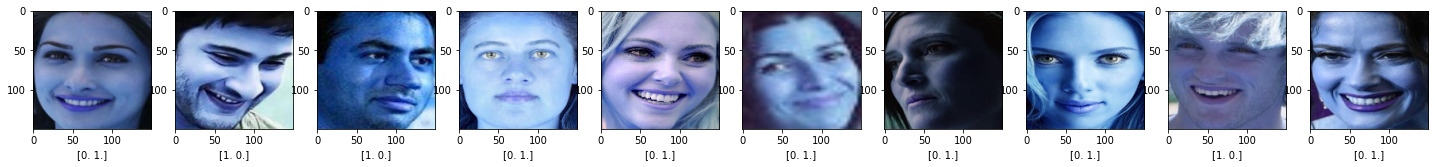

In [338]:
fig, ax = plt.subplots(1,10, figsize = (25,25))
for i in range(10):
    ax[i].imshow(X_train[i].reshape(150,150,3))
    ax[i].set_xlabel(Y_train[i])

In [339]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    layers.Conv2D(64, (2,2), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(2, activation='sigmoid')
])


In [340]:
model.compile(optimizer ="rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

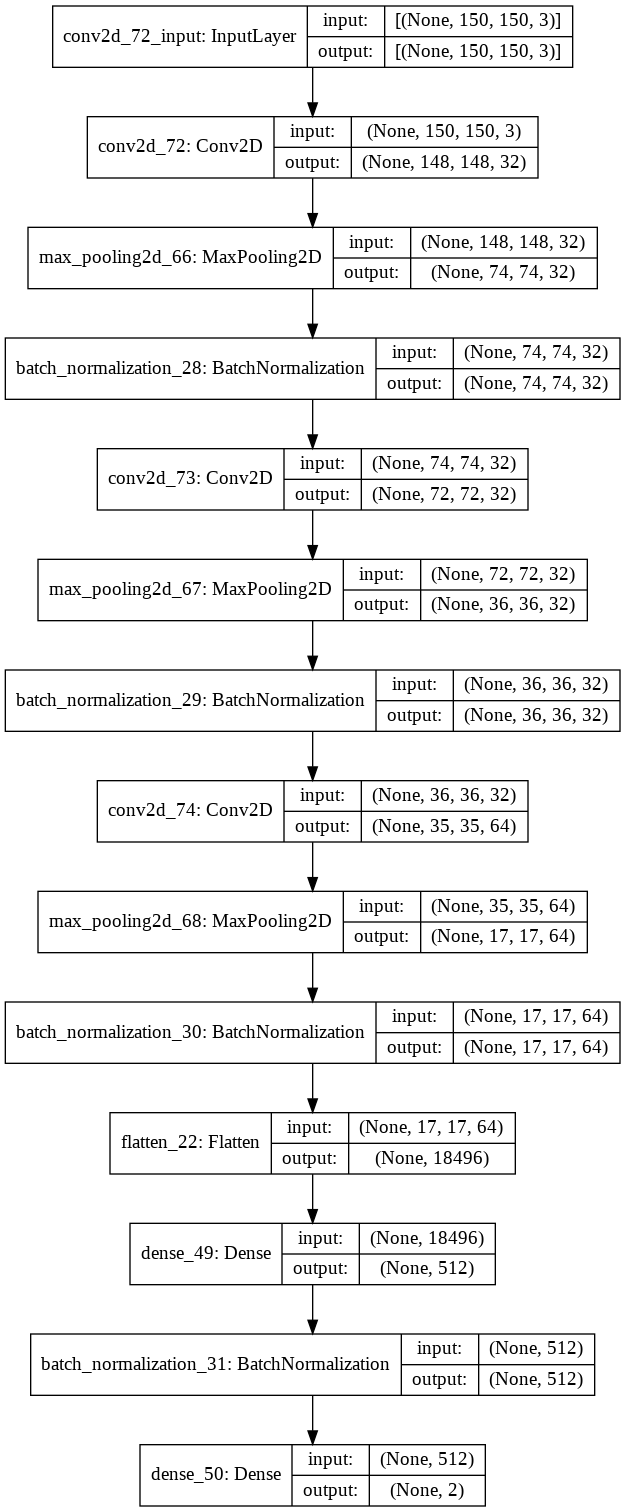

In [341]:
plot_model(model,show_shapes = True)

In [342]:
history = model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
58/58 [==============================] - 3s 29ms/step - loss: 0.5314 - accuracy: 0.8284
Epoch 2/10
58/58 [==============================] - 2s 28ms/step - loss: 0.2699 - accuracy: 0.8975
Epoch 3/10
58/58 [==============================] - 2s 28ms/step - loss: 0.1656 - accuracy: 0.9401
Epoch 4/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0876 - accuracy: 0.9746
Epoch 5/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0620 - accuracy: 0.9784
Epoch 6/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0554 - accuracy: 0.9827
Epoch 7/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0627 - accuracy: 0.9833
Epoch 8/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0332 - accuracy: 0.9870
Epoch 9/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0146 - accuracy: 0.9978
Epoch 10/10
58/58 [==============================] - 2s 28ms/step - loss: 0.0177 - accuracy: 0.9962


In [343]:
model.evaluate(X_test,Y_test)

15/15 [==============================] - 0s 9ms/step - loss: 0.2386 - accuracy: 0.9461


[0.2385990023612976, 0.9461206793785095]

### Plotting the Accuracy and loss

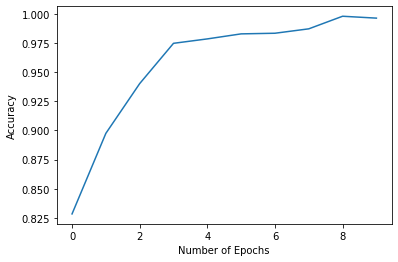

In [344]:
plt.plot(history.history["accuracy"])
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.show()

<function matplotlib.pyplot.show>

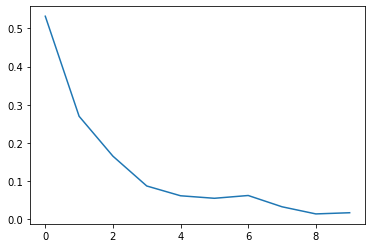

In [345]:
plt.plot(history.history["loss"])
plt.show

### Plotting the Images with Predicted Label

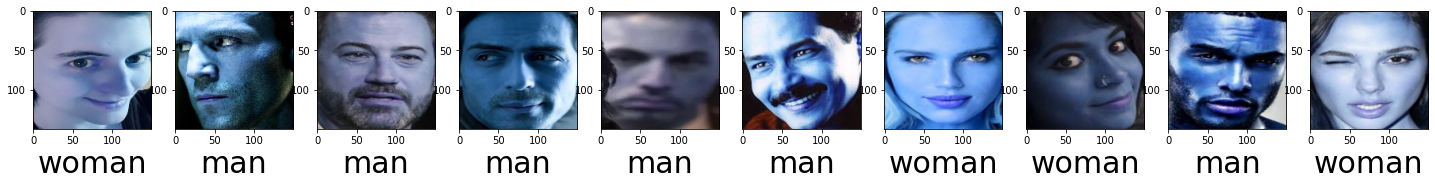

In [346]:
fig, ax = plt.subplots(1, 10, figsize=(25,20))
for idx, x in enumerate(X_test[:10]):
    ax[idx].imshow(x)
    ax[idx].set_xlabel(types[predictions[idx].argmax()], fontsize=30)